In [2]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [3]:
Univ = pd.read_csv("Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm = norm_func(Univ.iloc[:,1:])
df_norm.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
kmeans_clust=KMeans(n_clusters=5)
kmeans_clust.fit(df_norm)



KMeans(n_clusters=5)

In [17]:
kmeans_clust.labels_

array([0, 2, 4, 3, 3, 0, 0, 3, 0, 2, 0, 3, 3, 1, 0, 1, 0, 1, 4, 3, 4, 3,
       3, 1, 0])

In [22]:
df_norm.iloc[kmeans_clust.labels_==0,:]


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
10,0.914634,0.916667,0.210526,0.210526,0.476864,0.800000
14,0.902439,0.875000,0.000000,0.105263,0.392120,0.933333
16,0.865854,0.861111,0.078947,0.315789,0.505659,0.866667
24,0.902439,0.930556,0.065789,0.263158,0.634397,0.966667


In [26]:
kmeans_clust.cluster_centers_[0].reshape(1,df_norm.shape[1])
#kmeans_clust.labels_

array([[0.85823171, 0.87673611, 0.09868421, 0.25657895, 0.45879882,
        0.91666667]])

In [18]:
Univ["clusterID"]=pd.Series(kmeans_clust.labels_)

result=Univ.iloc[:,1:].groupby(Univ.clusterID).mean()
result


,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterID
clusterID,,,,,,,
0,1356.875000,91.125,21.500000,10.875,33878.750000,94.500000,0
1,1061.500000,38.750,70.000000,19.250,9953.000000,71.750000,1
2,1360.000000,87.500,34.500000,6.500,61133.000000,84.000000,2
3,1270.000000,78.875,36.500000,12.375,24494.500000,90.250000,3
4,1226.666667,74.000,55.666667,14.000,18545.333333,78.333333,4


In [ ]:
kmeans_clust.cluster_centers_
Univ["clusterID"]=pd.Series(kmeans_clust.labels_)
Univ
kmeans_clust.cluster_centers_[0].shape

In [14]:
k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    
    print("TWSS when k is",i,sum(WSS))
    TWSS.append(sum(WSS))
    


TWSS when k is 2 [9.18208121]
TWSS when k is 3 [7.85923615]
TWSS when k is 4 [7.18822217]
TWSS when k is 5 [6.00138182]
TWSS when k is 6 [5.51630685]
TWSS when k is 7 [5.05042599]


Text(0, 0.5, 'total_within_SS')

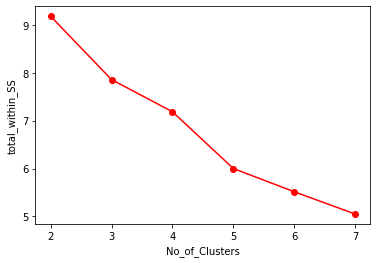

In [15]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [21]:
for i in [100,10,12,13,7,8]:
    print(i)

100
10
12
13
7
8
